### Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [67]:
###Load data here###
data = pd.read_csv('data.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedrooms  1000 non-null   int64  
 1   Area      1000 non-null   float64
 2   Price     1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


### Visualize Data

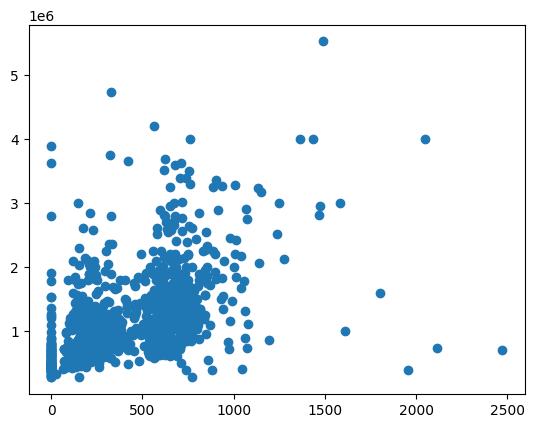

In [68]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Area.values, y=data.Price.values)
plt.show()

### Check for Missing Values

In [69]:
###Check for Missing Data###
data.isnull().sum()

Bedrooms    0
Area        0
Price       0
dtype: int64

### Perform Minmax Scaling

In [70]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [71]:
###Apply above function on appropriate columns###
data['Area_scaled'] = minmax_scaling(data, 'Area')
data['Price_scaled'] = minmax_scaling(data, 'Price')
data.head()
#data['Area'] = minmax_scaling(data, 'Area')
#data['Price'] = minmax_scaling(data, 'Price')
###Check the data after scaling###
data.head()

,Bedrooms,Area,Price,Area_scaled,Price_scaled
0,2,202.0,1480000.0,0.081748,0.228789
1,2,156.0,1035000.0,0.063132,0.143947
2,3,134.0,1465000.0,0.054229,0.225929
3,3,94.0,850000.0,0.038041,0.108675
4,4,120.0,1600000.0,0.048563,0.251668


### Divide Data into Training and Testing

In [72]:
def train_test_split (data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [73]:
###Understand the above function and divide data into X_train, X_test, y_train, y_test###
X_train, X_test = train_test_split(data, 0.2)

y_train = X_train.Price_scaled.values.reshape(-1, 1)
y_test = X_test.Price_scaled.values.reshape(-1, 1)


### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [74]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
###A bias vector/column is also required as a column in our stacked array (Hint: np.ones)###

### Prepare X_train for Normal Equation: add bias column ###
X_train_prepared = np.hstack((X_train.Area_scaled.values.reshape(-1, 1), np.ones((X_train.shape[0], 1))))

### Compute theta using Normal Equation ###
theta = np.linalg.inv(X_train_prepared.T @ X_train_prepared) @ X_train_prepared.T @ y_train
print(f"Theta:\n{theta}")

Theta:
[[0.48348789]
 [0.09470402]]


### Calculate Predictions on Test Set

In [75]:
###Calculate predictions on X_test using theta###
X_test_prepared = X_test.Area_scaled.values.reshape(-1, 1)
y_pred = X_test_prepared @ theta[0] + theta[1]
print(f"Predictions:\n{y_pred.flatten()}")


Predictions:
[0.21034196 0.12151011 0.13266301 0.15751244 0.22325584 0.09470402
 0.09470402 0.22129919 0.16299106 0.23597406 0.22638648 0.22873446
 0.09470402 0.21405959 0.09470402 0.14909885 0.13501098 0.38272271
 0.15614279 0.16044742 0.09470402 0.21171161 0.23636538 0.2095593
 0.31737064 0.09470402 0.1293367  0.21425525 0.09470402 0.24145267
 0.20701565 0.20877664 0.26160615 0.22482116 0.23108243 0.21171161
 0.13598931 0.20114571 0.15536013 0.22893012 0.21014629 0.09470402
 0.15262082 0.12835838 0.23362608 0.14420723 0.20877664 0.1220971
 0.12307543 0.11681415 0.13540231 0.19860207 0.23206076 0.12131444
 0.12796705 0.21405959 0.14362024 0.15144683 0.22286451 0.09470402
 0.2167989  0.24067001 0.13266301 0.09470402 0.20721132 0.17629627
 0.25280123 0.20036305 0.21171161 0.25945384 0.22697347 0.23186509
 0.21073329 0.20877664 0.13696763 0.21992954 0.15183816 0.24458331
 0.20486334 0.14401157 0.18921015 0.11446617 0.21738589 0.17610061
 0.21660323 0.23969169 0.20838531 0.23362608 0.2021

### Calculate MSE (Evaluate Model)

Mean Squared Error: 0.011601231647612705


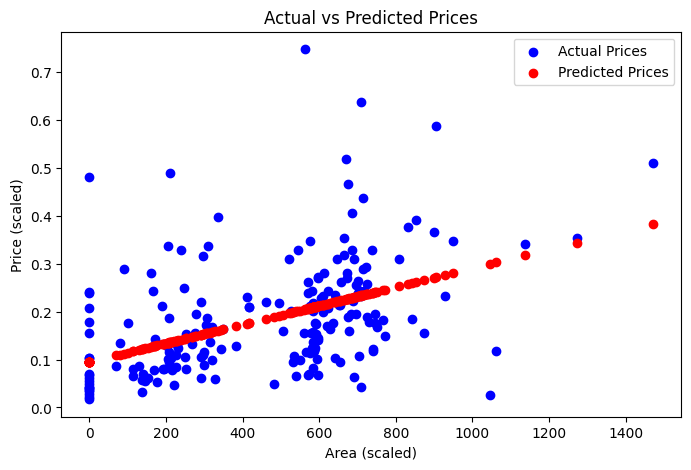

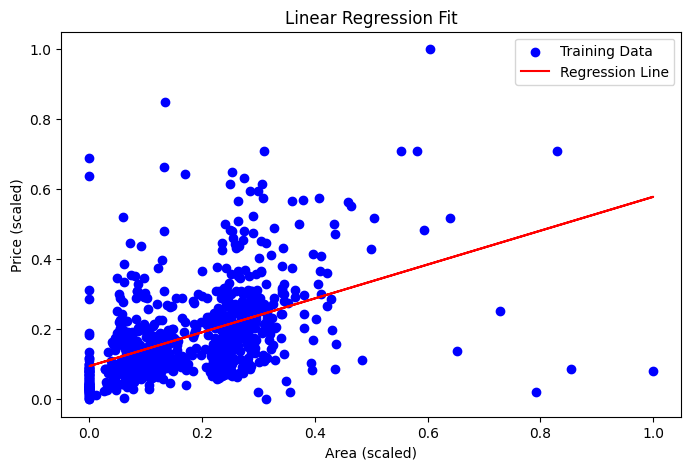

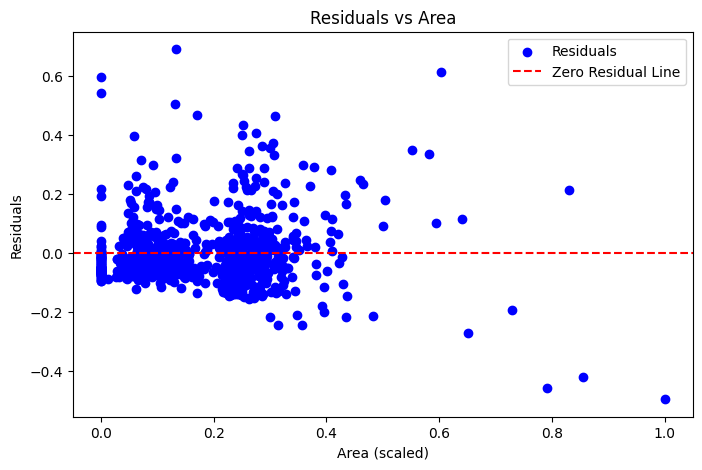

In [76]:
###Evaluate the regression model based on Mean Squared Error###

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### 1. Visualize predictions
plt.figure(figsize=(8, 5))
plt.scatter(X_test.Area.values, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test.Area.values, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

### 2. Visualize regression line
plt.figure(figsize=(8, 5))
plt.scatter(X_train_prepared[:, 0], y_train, color='blue', label='Training Data')
plt.plot(X_train_prepared[:, 0], X_train_prepared @ theta, color='red', label='Regression Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### 3. Visualize residuals
residuals = y_train - (X_train_prepared @ theta)
plt.figure(figsize=(8, 5))
plt.scatter(X_train_prepared[:, 0], residuals, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Residuals')
plt.title('Residuals vs Area')
plt.legend()
plt.show()

### Inverse Transform Model's Output

In [77]:
data.head()

,Bedrooms,Area,Price,Area_scaled,Price_scaled
0,2,202.0,1480000.0,0.081748,0.228789
1,2,156.0,1035000.0,0.063132,0.143947
2,3,134.0,1465000.0,0.054229,0.225929
3,3,94.0,850000.0,0.038041,0.108675
4,4,120.0,1600000.0,0.048563,0.251668


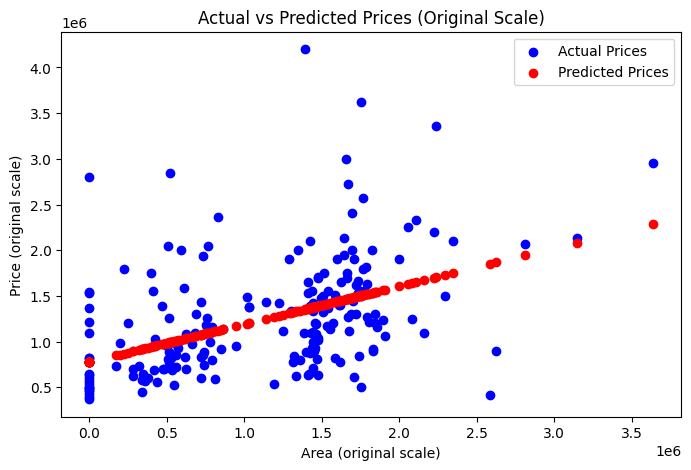

In [78]:
###Transform model's output back to original range/scale###
# Store original min and max for reverse scaling
price_min = data['Price'].min()
price_max = data['Price'].max()
area_min = data['Area'].min()
area_max = data['Area'].max()

# Inverse transform the predicted and actual prices
y_pred_original = y_pred * (price_max - price_min) + price_min
y_test_original = y_test * (price_max - price_min) + price_min

# Inverse transform the area values as well
area_original = X_test['Area'].values * (area_max - area_min) + area_min

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(area_original, y_test_original, color='blue', label='Actual Prices')
plt.scatter(area_original, y_pred_original, color='red', label='Predicted Prices')
plt.xlabel('Area (original scale)')
plt.ylabel('Price (original scale)')
plt.title('Actual vs Predicted Prices (Original Scale)')
plt.legend()
plt.show()


### Calcualte Weights Using Gradient Descent

In [79]:
#X_train, X_test = train_test_split(data, 0.2)
#y_train = X_train.Price_scaled.values.reshape(-1, 1)
#y_test = X_test.Price_scaled.values.reshape(-1, 1)

# Prepare X_train for Normal Equation: add bias column (for intercept term)
#X_train_prepared = np.hstack((X_train.Area_scaled.values.reshape(-1, 1), np.ones((X_train.shape[0], 1))))

# Initialize parameters for Gradient Descent
theta = np.zeros(X_train_prepared.shape[1])  # Initialize all theta values (including theta0) to 0
alpha = 0.01  # Learning rate
epochs = 100  # Number of iterations
n = X_train_prepared.shape[0]  # Number of data points

# Batch Gradient Descent
for i in range(epochs):
    # Compute the hypothesis (predictions)
    predictions = X_train_prepared.dot(theta)  # Dot product with theta
    
    # Compute the error (difference between predictions and actual values)
    error = predictions - y_train.flatten()  # Subtract the true values from the predicted values
    
    # Compute the gradient
    gradient = (1/n) * X_train_prepared.T.dot(error)  # Gradient of the cost function
    
    # Update theta values
    theta -= alpha * gradient  # Update theta

# Output the final theta values
print(f"Final theta values: {theta}")

Final theta values: [0.02881186 0.11423392]


In [80]:
###Implement Batch GD to compute the weight vector theta###

#y_train = y_train.values.reshape(y_train.shape[0], 1)
theta0, theta1, theta2 = 0, 0, 0
alpha = 0.01
epochs = 100
#n = X_train.shape[0]

for i in range(epochs):
    ###Implement GD###
    pass

theta_gd = np.vstack((theta0, theta1, theta2))

### Calculate Predictions on Test Test

In [81]:
###Calculate y_pred on weights from GD###
X_test_prepared = np.hstack((X_test.Area_scaled.values.reshape(-1, 1), np.ones((X_test.shape[0], 1))))  # Prepare X_test with bias term
y_pred = X_test_prepared.dot(theta)  # Compute predictions on the test set
print(f"Predictions using Gradient Descent:\n{y_pred.flatten()}")

Predictions using Gradient Descent:
[0.12112498 0.11583134 0.11649596 0.11797678 0.12189454 0.11423392
 0.11423392 0.12177794 0.11830326 0.12265244 0.1220811  0.12222102
 0.11423392 0.12134652 0.11423392 0.1174754  0.11663588 0.13139744
 0.11789516 0.11815168 0.11423392 0.1212066  0.12267576 0.12107834
 0.127503   0.11423392 0.11629774 0.12135818 0.11423392 0.12297892
 0.12092676 0.1210317  0.1241799  0.12198782 0.12236094 0.1212066
 0.11669418 0.12057696 0.11784852 0.12223268 0.12111332 0.11423392
 0.11768528 0.11623944 0.12251252 0.1171839  0.1210317  0.11586632
 0.11592462 0.1155515  0.1166592  0.12042538 0.12241924 0.11581968
 0.11621612 0.12134652 0.11714892 0.11761532 0.12187122 0.11423392
 0.12150976 0.12293228 0.11649596 0.11423392 0.12093842 0.11909614
 0.1236552  0.12053032 0.1212066  0.12405164 0.12211608 0.12240758
 0.1211483  0.1210317  0.11675248 0.12169632 0.11763864 0.12316548
 0.1207985  0.11717224 0.1198657  0.11541158 0.12154474 0.11908448
 0.1214981  0.12287398 0.12

### Calculate MSE (Evaluate Model)

Mean Squared Error: 0.018541152584833277


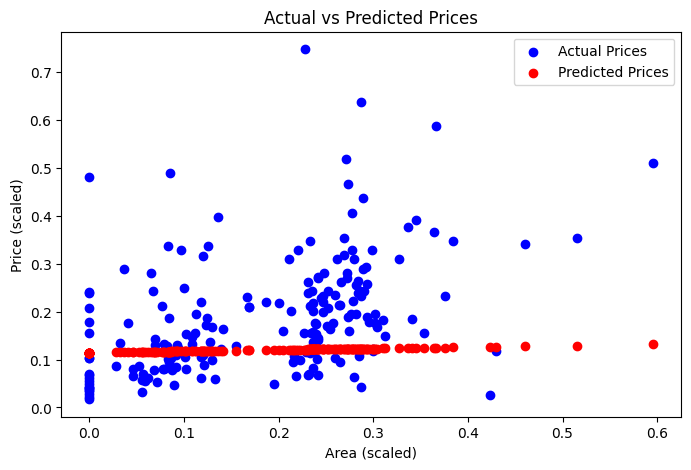

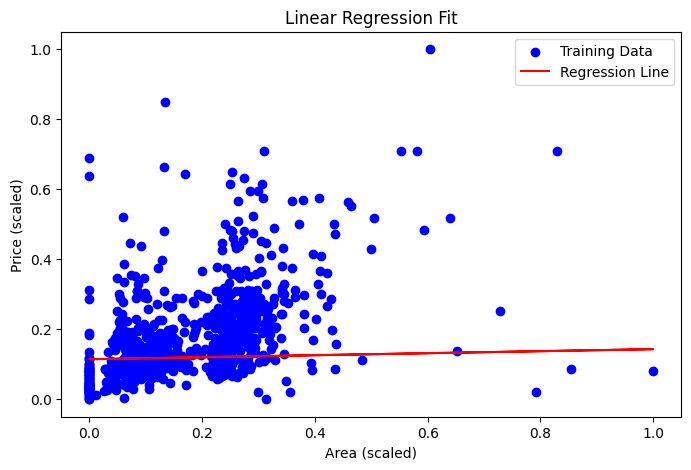

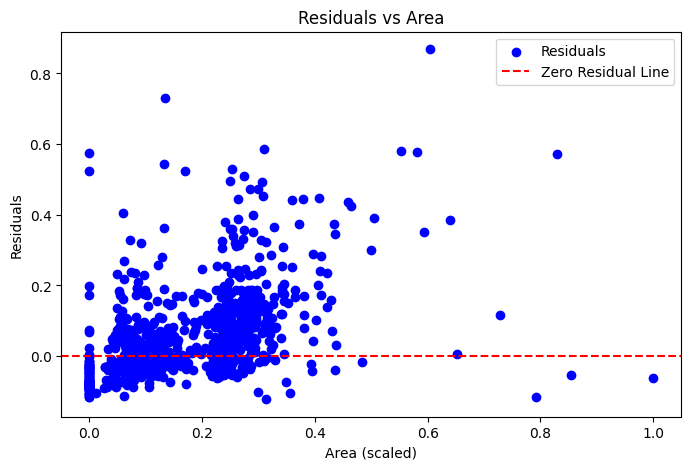

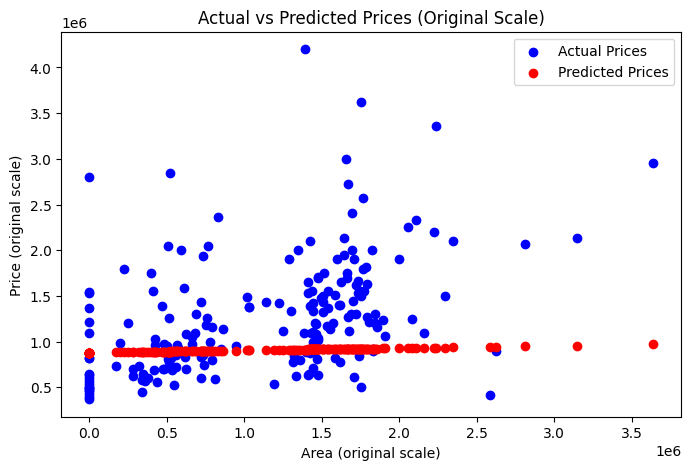

In [82]:
###Calculate MSE on y_pred from GD###
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predictions (Actual vs Predicted)
plt.figure(figsize=(8, 5))
plt.scatter(X_test.Area_scaled.values, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test.Area_scaled.values, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Visualize regression line (Training data + Regression line)
plt.figure(figsize=(8, 5))
plt.scatter(X_train_prepared[:, 0], y_train, color='blue', label='Training Data')
plt.plot(X_train_prepared[:, 0], X_train_prepared.dot(theta), color='red', label='Regression Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Visualize residuals (Training data + Residuals)
residuals = y_train.flatten() - X_train_prepared.dot(theta)
plt.figure(figsize=(8, 5))
plt.scatter(X_train_prepared[:, 0], residuals, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Residuals')
plt.title('Residuals vs Area')
plt.legend()
plt.show()

# Transform model's output back to original range/scale
price_min = data['Price'].min()
price_max = data['Price'].max()
area_min = data['Area'].min()
area_max = data['Area'].max()

# Inverse transform the predicted and actual prices
y_pred_original = y_pred * (price_max - price_min) + price_min
y_test_original = y_test * (price_max - price_min) + price_min

# Inverse transform the area values as well
area_original = X_test['Area'].values * (area_max - area_min) + area_min

# Plot actual vs predicted prices on original scale
plt.figure(figsize=(8, 5))
plt.scatter(area_original, y_test_original, color='blue', label='Actual Prices')
plt.scatter(area_original, y_pred_original, color='red', label='Predicted Prices')
plt.xlabel('Area (original scale)')
plt.ylabel('Price (original scale)')
plt.title('Actual vs Predicted Prices (Original Scale)')
plt.legend()
plt.show()

### Compare the two Approaches based on MSE ###

In [83]:
###Which approach is more accurate?###
###Which approach is fast###?

Normal Equation - MSE: 0.01323511104712357, Time Taken: 0.005080461502075195 seconds
Batch Gradient Descent - MSE: 0.023791981946246626, Time Taken: 0.017021894454956055 seconds


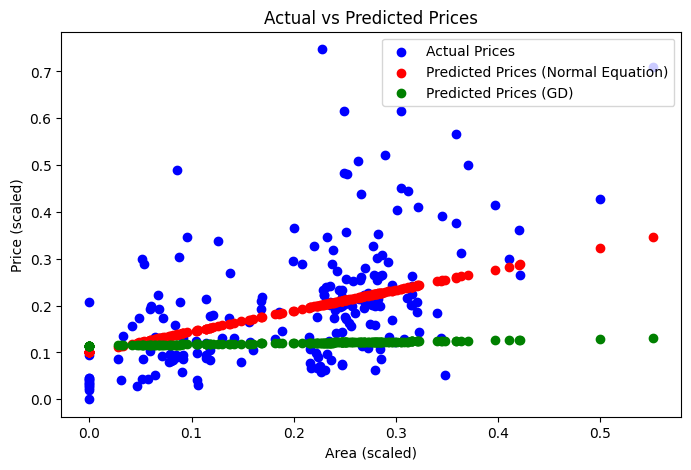

In [84]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# You should replace this with your actual data loading code.
# For the example, let's assume 'Area' and 'Price_scaled' columns exist.

# Split the data into training and testing sets
def train_test_split(data, ratio):
    indices = np.random.permutation(data.shape[0])
    test_set_size = int(data.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Prepare data (replace 'Area_scaled' and 'Price_scaled' with actual column names)
X_train, X_test = train_test_split(data, 0.2)
y_train = X_train.Price_scaled.values.reshape(-1, 1)
y_test = X_test.Price_scaled.values.reshape(-1, 1)

# Prepare the data with an intercept term (bias)
X_train_prepared = np.hstack((X_train.Area_scaled.values.reshape(-1, 1), np.ones((X_train.shape[0], 1))))
X_test_prepared = X_test.Area_scaled.values.reshape(-1, 1)

# ===================== Normal Equation =====================

# Measure time for Normal Equation
start_time = time.time()

# Normal Equation: theta = (X'X)^(-1) X'y
theta_ne = np.linalg.inv(X_train_prepared.T @ X_train_prepared) @ X_train_prepared.T @ y_train

# Predictions using Normal Equation
y_pred_ne = X_test_prepared @ theta_ne[0] + theta_ne[1]

# Compute Mean Squared Error for Normal Equation
mse_ne = mean_squared_error(y_test, y_pred_ne)

# Time taken for Normal Equation
time_ne = time.time() - start_time
print(f"Normal Equation - MSE: {mse_ne}, Time Taken: {time_ne} seconds")

# ===================== Batch Gradient Descent =====================

# Initialize parameters for Gradient Descent
theta_gd = np.zeros(X_train_prepared.shape[1])  # Initialize all theta values (including theta0) to 0
alpha = 0.01  # Learning rate
epochs = 100  # Number of iterations
n = X_train_prepared.shape[0]  # Number of data points

# Measure time for Gradient Descent
start_time = time.time()

# Batch Gradient Descent
for i in range(epochs):
    # Compute the hypothesis (predictions)
    predictions = X_train_prepared.dot(theta_gd)  # Dot product with theta
    
    # Compute the error (difference between predictions and actual values)
    error = predictions - y_train.flatten()  # Subtract the true values from the predicted values
    
    # Compute the gradient
    gradient = (1/n) * X_train_prepared.T.dot(error)  # Gradient of the cost function
    
    # Update theta values
    theta_gd -= alpha * gradient  # Update theta

# Predictions using Gradient Descent
X_test_prepared = np.hstack((X_test.Area_scaled.values.reshape(-1, 1), np.ones((X_test.shape[0], 1))))  # Prepare X_test with bias term
y_pred_gd = X_test_prepared.dot(theta)  # Compute predictions on the test set
#print(f"Predictions using Gradient Descent:\n{y_pred.flatten()}")
#y_pred_gd = X_test_prepared @ theta_gd[0] + theta_gd[1]

# Compute Mean Squared Error for Gradient Descent
mse_gd = mean_squared_error(y_test, y_pred_gd)

# Time taken for Gradient Descent
time_gd = time.time() - start_time
print(f"Batch Gradient Descent - MSE: {mse_gd}, Time Taken: {time_gd} seconds")

# ===================== Visualization =====================

# 1. Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(X_test.Area_scaled.values, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test.Area_scaled.values, y_pred_ne, color='red', label='Predicted Prices (Normal Equation)')
plt.scatter(X_test.Area_scaled.values, y_pred_gd, color='green', label='Predicted Prices (GD)')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


